In [11]:
import pandas as pd
ha_cost_df = pd.read_csv ('../data/mmd_heart_attack_data.csv') # create a DataFrame
ha_cost_df = ha_cost_df.loc[ha_cost_df["state"] == "TENNESSEE"] # keep only the rows for state in TN

In [12]:
cancer_cost_df = pd.read_csv("../data/mmd_cancer_data.csv") # create another DataFrame 
cancer_cost_df = cancer_cost_df.loc[cancer_cost_df["state"] == "TENNESSEE"] # only keep row for TN

In [13]:
income_df = pd.read_csv("../data/irs_county_2016.csv")
income_df = income_df.loc[income_df["STATE"] == "TN"]
income_df = income_df.loc[:, ['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']]
income_df.columns = ['state', 'county', 'income_bucket', 'return_count', 'single_returns', 'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents', 'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment', 'unemployment_comp']

In [14]:
ha_cost_df.describe() # look at the distribution 

,year,fips,analysis_value
count,91.0,91.000000,91.000000
mean,2017.0,47093.615385,45762.989011
std,0.0,55.338708,6574.670462
min,2017.0,47001.000000,30831.000000
25%,2017.0,47046.000000,41105.500000
50%,2017.0,47093.000000,45384.000000
75%,2017.0,47142.000000,49698.500000
max,2017.0,47189.000000,62641.000000


In [15]:
cancer_cost_df.describe() # look at the description 

,year,fips,analysis_value
count,95.0,95.000000,95.000000
mean,2017.0,47095.000000,19757.894737
std,0.0,55.136195,2436.304533
min,2017.0,47001.000000,15454.000000
25%,2017.0,47048.000000,18103.500000
50%,2017.0,47095.000000,19563.000000
75%,2017.0,47142.000000,21153.000000
max,2017.0,47189.000000,27740.000000


In [16]:
income_df.head

<bound method NDFrame.head of       state         county  income_bucket  return_count  single_returns  \
19752    TN      Tennessee              1         39580           22400   
19753    TN      Tennessee              2        439770          345410   
19754    TN      Tennessee              3        717430          398720   
19755    TN      Tennessee              4        759340          355970   
19756    TN      Tennessee              5        396810          128390   
...     ...            ...            ...           ...             ...   
20515    TN  Wilson County              4         14400            7130   
20516    TN  Wilson County              5          9330            2890   
20517    TN  Wilson County              6          7160            1060   
20518    TN  Wilson County              7         10350             780   
20519    TN  Wilson County              8          2370             180   

       joint_returns  head_of_house_returns  exemptions  dependents  

In [17]:
ha_cost_df_urban = ha_cost_df.loc[ha_cost_df['urban'] == 'Urban']
ha_cost_df_urban.analysis_value.describe()

count       38.000000
mean     45748.921053
std       7109.788921
min      32279.000000
25%      40452.750000
50%      45496.500000
75%      50734.500000
max      61541.000000
Name: analysis_value, dtype: float64

In [18]:
ha_cost_df_rural = ha_cost_df.loc[ha_cost_df['urban'] == 'Rural']
ha_cost_df_rural.analysis_value.describe()

count       53.000000
mean     45773.075472
std       6232.724885
min      30831.000000
25%      41240.000000
50%      45384.000000
75%      48998.000000
max      62641.000000
Name: analysis_value, dtype: float64

KeyError: 'rural'

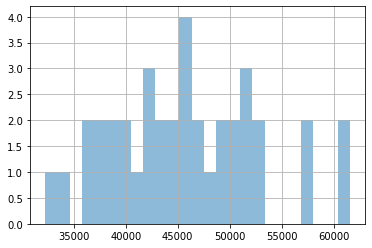

In [23]:
h = ha_cost_df_urban.analysis_value[ha_cost_df["urban"] == 'Urban'].hist(alpha=0.5,bins=25,label='Ha Costs - Urban')
ha_cost_df_rural.analysis_value[ha_cost_df["rural"] == 'Rural'].hist(alpha=0.5,bins=25,label='Ha Costs - Rural')
h.legend()    # make histology to see it 

In [32]:
income_dict = {0:'Total', 
               1:'Under $1', 
               2:'Between 1 and $10,000', 
               3:'Between 10,000 and $25,000', 
               4:'Between 25,000 and $50,000', 
               5:'Between 50,000 and $75,000', 
               6:'Between 75,000 and $100,000', 
               7:'Between 100,000 and $200,000', 
               8:'$200,000 or more'}

In [37]:
income_df.income_bucket.replace(income_dict)

19752                        Under $1
19753           Between 1 and $10,000
19754      Between 10,000 and $25,000
19755      Between 25,000 and $50,000
19756      Between 50,000 and $75,000
                     ...             
20515      Between 25,000 and $50,000
20516      Between 50,000 and $75,000
20517     Between 75,000 and $100,000
20518    Between 100,000 and $200,000
20519                $200,000 or more
Name: income_bucket, Length: 768, dtype: object

In [42]:
income_county_agg = income_df.groupby(by=['county']).sum().reset_index()

In [43]:
income_county_agg 

,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
0,Anderson County,36,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452
1,Bedford County,36,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023
2,Benton County,36,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119
3,Bledsoe County,36,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458
4,Blount County,36,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Wayne County,36,5730,2150,2720,810,11830,3690,1430,240866,5700,243850,290,987
92,Weakley County,36,12850,5440,5360,1800,25130,7820,3320,563374,12810,572176,600,1449
93,White County,36,11030,4430,4900,1510,22230,6900,2790,438258,10990,444471,360,770
94,Williamson County,36,103130,39860,54520,6880,226210,79870,24130,13101310,102890,13383074,1430,5125


In [ ]:
income_county_agg_county_only = income_county_agg.loc[income_county_agg['county'] != 'Tennessee'] #exclude total TN data to leave just individual county data
income_county_agg_county_only.loc[income_county_agg_county_only['return_count'].idxmax()]
